# Advanced Numerical Techniques Assignment 1
### Rishabh Kumar 
#### 16MA20036

    The differential equation to be solved is
    (y'')(x^2) + xy' = 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 15]

    Tridiagonal Matrix Algorithm (TDMA) is also known as Thomas Algorithm which is implemented in the cell below.

In [2]:
def A(x):
    return (1./x)
def B(x):
    return 0.
def C(x):
    return(1./x**2)

def TDMA(diag, sub, sup, d):
    """
    All the parameters are numpy arrays
    diag --> Diagonal entries of the tri-diagonal matrix
    sub --> Sub-Diagonal entries of the tri-diagonal matrix
    sup --> Super-Diagonal entries of the tri-diagonal matrix
    """
    n = len(diag)
    sup[0] = sup[0]/diag[0]
    d[0] = d[0]/diag[0]
    for i in range(1, n):
        sup[i] = sup[i]/(diag[0] - sup[i - 1]*sub[i])
        d[i] = (d[i] - d[i - 1]*sub[i])/(diag[0] - sup[i - 1]*sub[i])
    
    y = np.zeros(n)
    y[n - 1] =  d[n - 1]
    for i in range(n - 2, -1, -1):
        y[i] = d[i] - sup[i] * y[i + 1]
    return y



    Finding the solution of Boundary Value problem 

In [3]:
def BVPsolution(y0, yn, x0, xn, h):
    n = int((xn -x0)/h) + 1
    diag = [1 for i in range(1, n)]
    sub = [1 for i in range(1, n)]
    sup = [1 for i in range(1, n)]
    d = [1 for i in range(1, n)]
    for i in range(1, n):
        x = x0 + i*h
#         print(sub, diag, sup)
        sub[i-1] = (1.0 / (h ** 2))- (A(x) / (2.0 * h))
        diag[i-1] = (-2.0 / (h ** 2)) + B(x)
        sup[i-1] = (1.0 / (h ** 2)) + (A(x) / (2.0 * h))
        if i == 1:
            d[i-1] = C(x) - sub[i-1] * y0
        elif i == n - 1 :
            d[i-1] = C(x) - sup[i-1] * yn
        else:
            d[i-1] = C(x)
    y = TDMA(diag, sub, sup, d)
    np.insert(y, 1, y0)
#     print("The SOLN: ", y)
    return y 
            

In [15]:
# Take Differential Equation as an inputs
# Initializing boundary conditions y(1) = 0, y(1.4) = 0.0566
x0 = 1
xn = 1.4
y0 = 0
yn = 0.0566
steps = [0.1, 0.05, 0.01]
# n = int((xn - x0)/steps[1]) + 1
# for i in range(1, n):
#     print(x0 + i*steps[1])
y_0 = np.insert(BVPsolution(y0, yn, x0, xn, steps[0]), 0, 0)
y_1 = np.insert(BVPsolution(y0, yn, x0, xn, steps[1]), 0, 0)
y_2 = np.insert(BVPsolution(y0, yn, x0, xn, steps[2]), 0, 0)
print('Values of xi wrt step = 0.1') 
print(y_0)
print('Values of xi wrt step = 0.05') 
print(y_1)
print('Values of xi wrt step = 0.01') 
print(y_2)

Values of xi wrt step = 0.1
[0.         0.00457418 0.01665575 0.03443745]
Values of xi wrt step = 0.05
[0.         0.00119469 0.00454866 0.00977376 0.01662666 0.02490052
 0.03441855 0.04502879]
Values of xi wrt step = 0.01
[0.00000000e+00 4.93560595e-05 1.95772553e-04 4.36408608e-04
 7.68523908e-04 1.18947432e-03 1.69670776e-03 2.28776025e-03
 2.96025219e-03 3.71188485e-03 4.54043696e-03 5.44376152e-03
 6.41978281e-03 7.46649343e-03 8.58195161e-03 9.76427853e-03
 1.10116559e-02 1.23223235e-02 1.36945769e-02 1.51267656e-02
 1.66172905e-02 1.81646021e-02 1.97671990e-02 2.14236254e-02
 2.31324701e-02 2.48923644e-02 2.67019806e-02 2.85600307e-02
 3.04652649e-02 3.24164700e-02 3.44124685e-02 3.64521168e-02
 3.85343045e-02 4.06579532e-02 4.28220150e-02 4.50254718e-02
 4.72673341e-02 4.95466401e-02 5.18624551e-02 5.42138697e-02]


Plotting wrt h = 0.1, h = 0.05, h =0.01


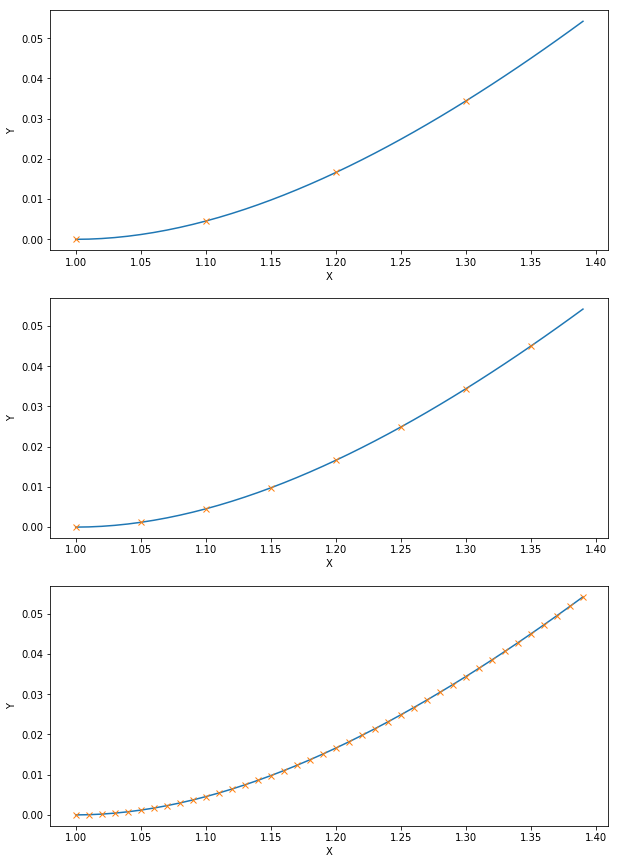

In [14]:

def f(x0, xn, h = 0.1):
    return np.arange(x0, xn, h)

def func(arr):
    return (np.power(np.log(arr), 2)/2)

x_range0 = f(x0, xn, h = steps[0])
x_range1 = f(x0, xn, h = steps[1])
x_range2 = f(x0, xn, h = steps[2])

y_range0 = func(x_range0)
y_range1 = func(x_range1)
y_range2 = func(x_range2)

print("Plotting wrt h = 0.1, h = 0.05, h =0.01")
# print((y_range0 - y_0)/y_range0)
# print((y_range1 - y_1)/y_range1)
# print((y_range2 - y_2)/y_range2)
#Plotting step = 0.1 

plt.subplot(3, 1, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_range2, y_range2, '-', x_range0, y_0, 'x')
#Plotting step = 0.05 
plt.subplot(3, 1, 2)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_range2, y_range2, '-', x_range1, y_1, 'x')
#Plotting step = 0.001 
plt.subplot(3, 1, 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_range2, y_range2, '-', x_range2, y_2, 'x')
plt.show()